<a href="https://colab.research.google.com/github/Jidnya28/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Step 1: Data Loading

In [4]:
data = pd.read_excel(r'Houses.xlsx',index_col=0)
data

,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,price
area_sqft,,,,,,,
3974,3,1,11,2.8,3,4.6,514.15
1660,3,1,16,14.4,6,3.5,125.82
2094,1,3,28,9.5,1,2.3,213.67
1930,5,2,5,4.2,7,4.3,327.44
1895,1,1,6,10.4,1,2.5,188.46
...,...,...,...,...,...,...,...
2106,2,2,18,6.0,3,3.5,283.23
3480,3,3,16,13.3,3,1.9,412.81
3475,4,1,20,6.5,4,3.1,397.51


In [5]:
print(data.dtypes)

bedrooms                     int64
bathrooms                    int64
age_years                    int64
distance_city_center_km    float64
num_schools_nearby           int64
crime_rate_index           float64
price                      float64
dtype: object


In [6]:
data.describe()

,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.790000,1.905000,14.710000,7.409500,4.885000,3.051500,327.164200
std,1.384008,0.830314,8.780741,3.896521,2.581686,1.166491,113.913716
min,1.000000,1.000000,0.000000,1.200000,1.000000,1.000000,37.580000
25%,1.000000,1.000000,7.000000,3.775000,3.000000,2.100000,240.812500
50%,3.000000,2.000000,15.000000,7.100000,5.000000,3.100000,327.945000
75%,4.000000,3.000000,22.000000,10.400000,7.000000,4.000000,415.150000
max,5.000000,3.000000,29.000000,14.900000,9.000000,5.000000,564.630000


In [7]:
data.isnull().sum()

,0
bedrooms,0
bathrooms,0
age_years,0
distance_city_center_km,0
num_schools_nearby,0
crime_rate_index,0
price,0


<Axes: >

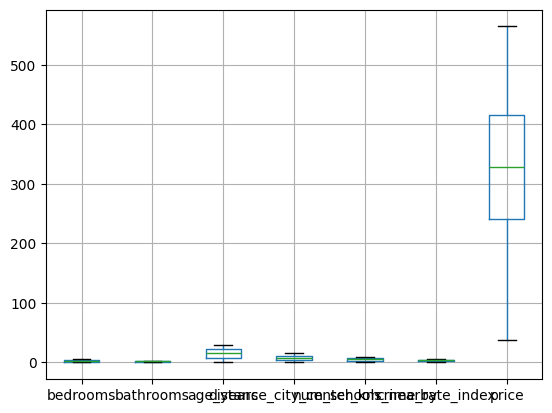

In [8]:
data.boxplot()

In [9]:
data.columns

Index(['bedrooms', 'bathrooms', 'age_years', 'distance_city_center_km',
       'num_schools_nearby', 'crime_rate_index', 'price'],
      dtype='object')

Pre Assumptions

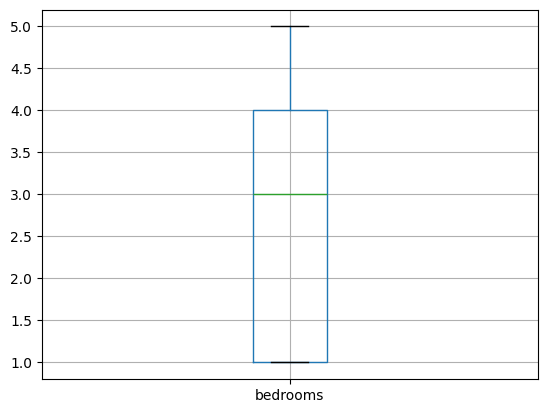

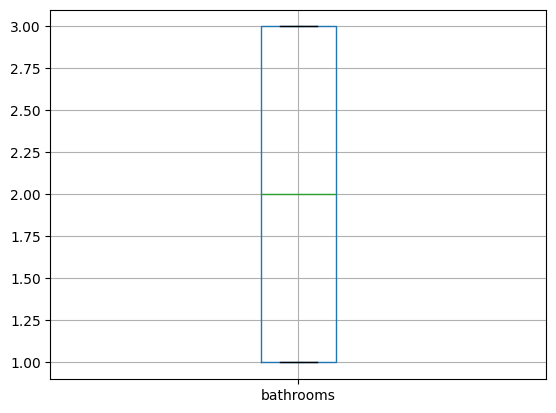

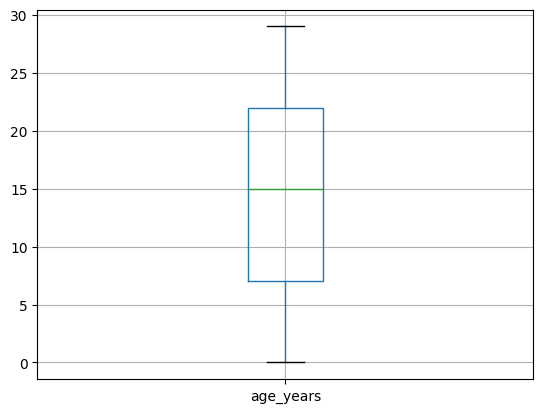

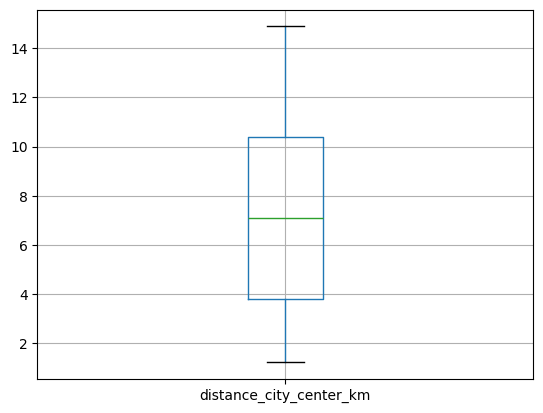

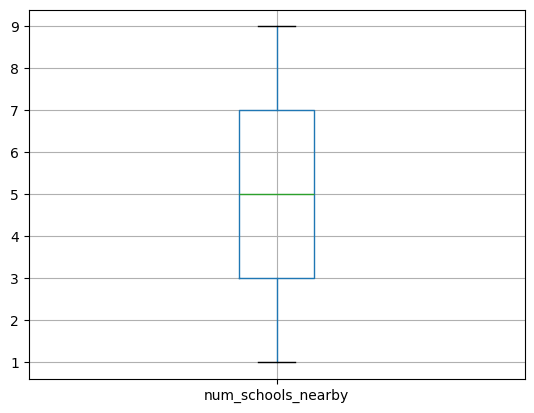

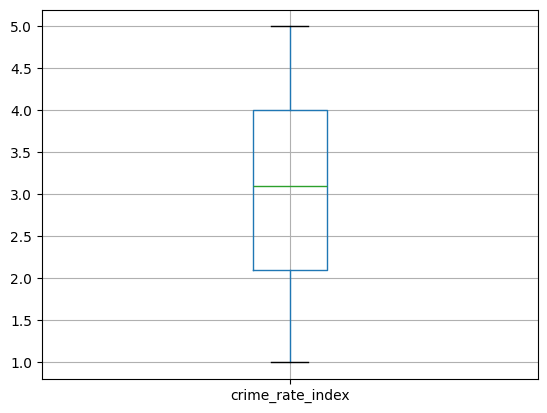

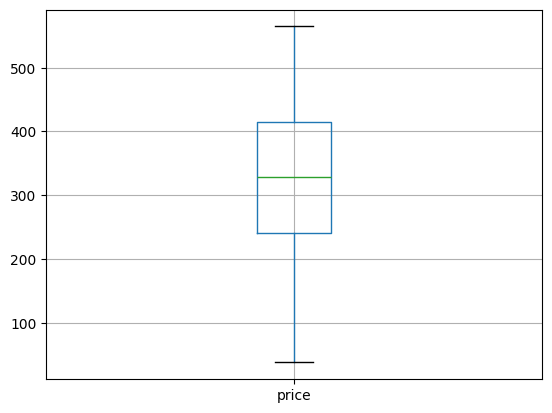

In [10]:
#Assumption 1: There should be no outliers in the data.
#Check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [11]:
# Check missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 bedrooms                   0
bathrooms                  0
age_years                  0
distance_city_center_km    0
num_schools_nearby         0
crime_rate_index           0
price                      0
dtype: int64


In [12]:
# If any missing values exist, drop them (or you can impute)
df = data.dropna()

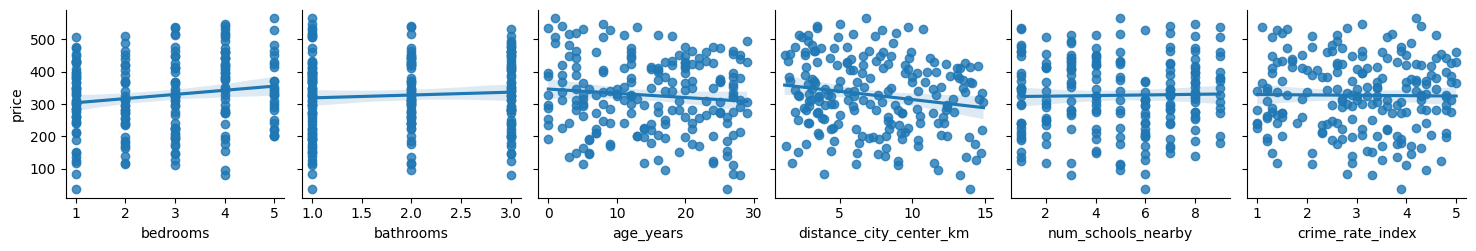

In [13]:
#Assumption 2:Assumption of Linearity:Every independent variable should have a
#linear relationship with the dependent variable.

sns.pairplot(df,
             x_vars=['bedrooms', 'bathrooms', 'age_years',
                     'distance_city_center_km', 'num_schools_nearby',
                     'crime_rate_index'],
             y_vars=["price"], kind='reg')
plt.show()


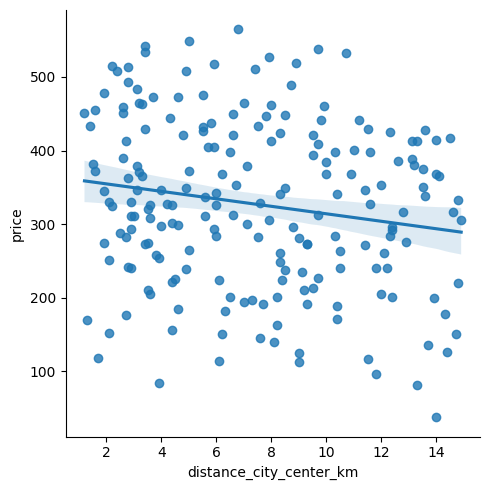

In [14]:
sns.lmplot(data=df, x="distance_city_center_km", y="price")
plt.show()


In [15]:
# Define X (features) & y (target)

features = [
    "bedrooms",
    "bathrooms",
    "age_years",
    "distance_city_center_km",
    "num_schools_nearby",
    "crime_rate_index"
]

X = df[features]
y = df["price"]


In [16]:
X

,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index
area_sqft,,,,,,
3974,3,1,11,2.8,3,4.6
1660,3,1,16,14.4,6,3.5
2094,1,3,28,9.5,1,2.3
1930,5,2,5,4.2,7,4.3
1895,1,1,6,10.4,1,2.5
...,...,...,...,...,...,...
2106,2,2,18,6.0,3,3.5
3480,3,3,16,13.3,3,1.9
3475,4,1,20,6.5,4,3.1


In [17]:
y

,price
area_sqft,
3974,514.15
1660,125.82
2094,213.67
1930,327.44
1895,188.46
...,...
2106,283.23
3480,412.81
3475,397.51


In [18]:
print(X.shape)
print(y.shape)

(200, 6)
(200,)


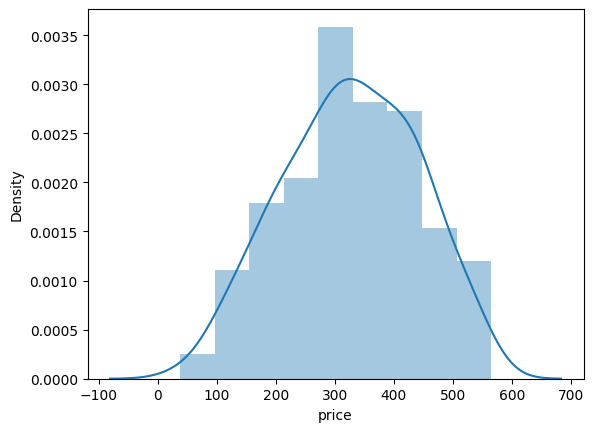

In [19]:
#Assumption of Normality: The dependent variable should follow an
#approximate normal distribution
sns.distplot(y)
plt.show()

In [20]:
from scipy.stats import skew
skew(y)

np.float64(-0.13076559422897957)

In [21]:
from scipy.stats import skew
skew(df["price"])

np.float64(-0.13076559422897957)

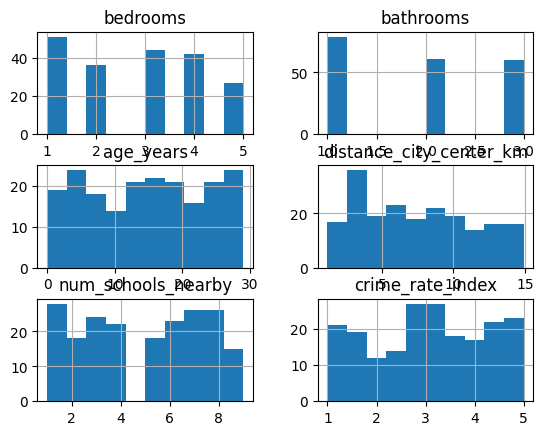

bedrooms : 0.1064078680185254
bathrooms : 0.17840426825743602
age_years : -0.045678109533927466
distance_city_center_km : 0.24998018713092965
num_schools_nearby : -0.04131070952059143
crime_rate_index : -0.1296460937644198


In [22]:
#Checking Skewness of X variables
X = df.drop("price", axis=1)
X.hist(bins=10)
plt.show()
for i in X.columns:
    print(f"{i} : {skew(X[i])}")


In [23]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
data_num_skew
data_num_skewed

,0


In [24]:
#log transformation
#new_crime = np.log1p(df["crime_rate_index"])
#sns.distplot(new_crime)
#plt.show()


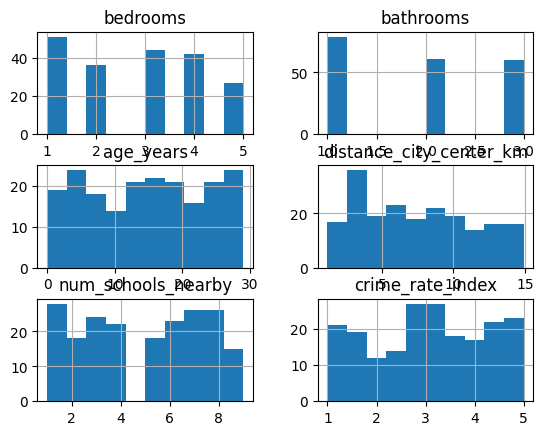

In [25]:
X.hist(bins=10)
plt.show()

                         bedrooms  bathrooms  age_years  \
bedrooms                 1.000000   0.078755  -0.009998   
bathrooms                0.078755   1.000000   0.017569   
age_years               -0.009998   0.017569   1.000000   
distance_city_center_km -0.000653   0.063185  -0.034214   
num_schools_nearby      -0.096802  -0.091859   0.025566   
crime_rate_index        -0.059255   0.036206  -0.004520   

                         distance_city_center_km  num_schools_nearby  \
bedrooms                               -0.000653           -0.096802   
bathrooms                               0.063185           -0.091859   
age_years                              -0.034214            0.025566   
distance_city_center_km                 1.000000            0.079635   
num_schools_nearby                      0.079635            1.000000   
crime_rate_index                       -0.010888            0.073227   

                         crime_rate_index  
bedrooms                        -0.05

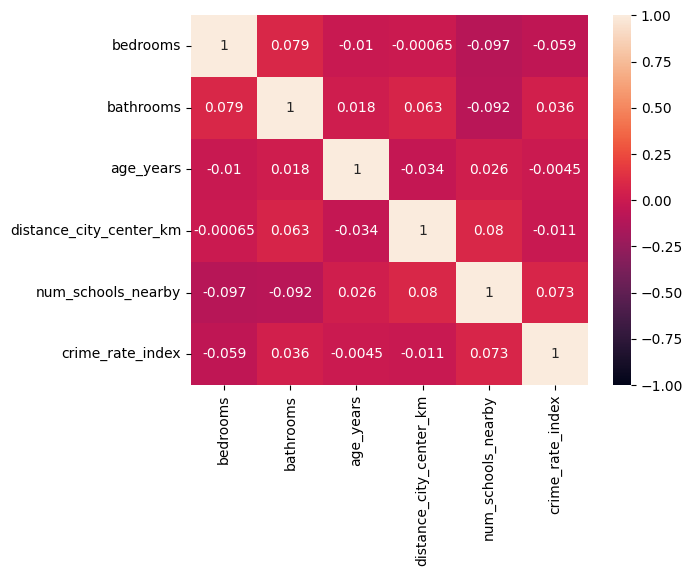

In [26]:
#Assumption of no multicollinearity: There should be no multicollinearity
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

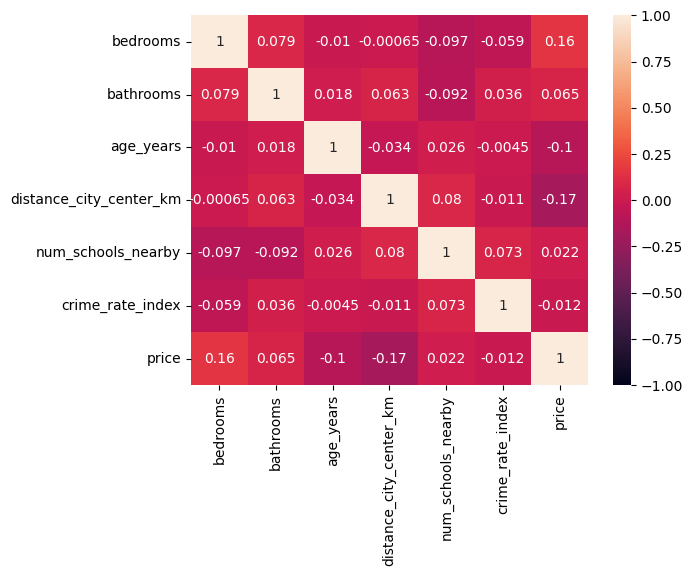

In [27]:
sns.heatmap(data.corr(method="pearson"),vmax=1.0,vmin=-1.0,annot=True)
plt.show()